In [2]:
import pandas as pd
from PyQt5.QtCore import QDate
from nltk import NaiveBayesClassifier

df_fake = pd.read_csv('data/Fake.csv')
df_true = pd.read_csv('data/True.csv')

df_fake["label"] = 1  # Fake news
df_true["label"] = 0  # True news

df_combined = pd.concat([df_fake, df_true], axis=0)
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

df_combined

title  \
0      Ben Stein Calls Out 9th Circuit Court: Committ...   
1      Trump drops Steve Bannon from National Securit...   
2      Puerto Rico expects U.S. to lift Jones Act shi...   
3       OOPS: Trump Just Accidentally Confirmed He Le...   
4      Donald Trump heads for Scotland to reopen a go...   
...                                                  ...   
44893  UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...   
44894  PM May seeks to ease Japan's Brexit fears duri...   
44895  Merkel: Difficult German coalition talks can r...   
44896   Trump Stole An Idea From North Korean Propaga...   
44897  BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...   

                                                    text       subject  \
0      21st Century Wire says Ben Stein, reputable pr...       US_News   
1      WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2      (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3      On Monday, Donald Trump once again embarrassed...          News   
4      GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   
...                                                  ...           ...   
44893                                                         politics   
44894  LONDON/TOKYO (Reuters) - British Prime Ministe...     worldnews   
44895  BERLIN (Reuters) - Chancellor Angela Merkel sa...     worldnews   
44896  Jesus f*cking Christ our President* is a moron...          News   
44897  IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...      politics   

                      date  label  
0        February 13, 2017      1  
1           April 5, 2017       0  
2      September 27, 2017       0  
3             May 22, 2017      1  
4           June 24, 2016       0  
...                    ...    ...  
44893         Mar 27, 2017      1  
44894     August 29, 2017       0  
44895   November 16, 2017       0  
44896        July 14, 2017      1  
44897         Apr 23, 2015      1  

[44898 rows x 5 columns]

In [40]:
df_combined.to_csv("data/full_fake_news_dataset.csv", index=False)
df = pd.read_csv("data/full_fake_news_dataset.csv")
df.head()

title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0

In [43]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)

# Apply PCA
n_components = 100  # Adjust as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_tfidf.toarray())

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train.toarray(), y_train)
lda_coefficients = np.abs(lda.coef_).flatten()

[CV] END colsample_bytree=0.9566202762782356, gamma=0.2556711994304689, learning_rate=0.16045488840615987, max_depth=6, n_estimators=370, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.5253842655196985; total time=   0.1s
[CV] END colsample_bytree=0.9566202762782356, gamma=0.2556711994304689, learning_rate=0.16045488840615987, max_depth=6, n_estimators=370, reg_alpha=0.07094091699992766, reg_lambda=0.3967838272138884, subsample=0.5253842655196985; total time=   0.1s
[CV] END colsample_bytree=0.8532378632434505, gamma=0.01579307241282102, learning_rate=0.29086367387310696, max_depth=9, n_estimators=272, reg_alpha=0.5412963353010705, reg_lambda=0.7090605194509164, subsample=0.9354845618730427; total time=   0.1s
[CV] END colsample_bytree=0.8532378632434505, gamma=0.01579307241282102, learning_rate=0.29086367387310696, max_depth=9, n_estimators=272, reg_alpha=0.5412963353010705, reg_lambda=0.7090605194509164, subsample=0.9354845618730427; total time=   0.1s
[CV]

In [44]:
# Compute covariance matrix of PCA-transformed data
cov_matrix = np.cov(X_pca, rowvar=False)

# Convert to DataFrame for readability
cov_df = pd.DataFrame(cov_matrix, 
                      index=[f"PC{i+1}" for i in range(n_components)], 
                      columns=[f"PC{i+1}" for i in range(n_components)])

# Display covariance matrix (first few rows for readability)
print("PCA Covariance Matrix:")
print(cov_df.head())


PCA Covariance Matrix:
              PC1           PC2           PC3           PC4           PC5  \
PC1  1.208580e-02  4.852914e-19  2.386274e-19  1.574879e-19  2.543916e-19   
PC2  4.852914e-19  8.771744e-03 -5.968775e-18 -4.177524e-19  4.425115e-18   
PC3  2.386274e-19 -5.968775e-18  7.120864e-03  3.387457e-18 -5.016707e-17   
PC4  1.574879e-19 -4.177524e-19  3.387457e-18  6.291600e-03  7.445050e-18   
PC5  2.543916e-19  4.425115e-18 -5.016707e-17  7.445050e-18  5.927877e-03   

              PC6           PC7           PC8           PC9          PC10  \
PC1 -1.582606e-19  2.324839e-19 -1.746431e-19  9.705827e-20  1.108906e-19   
PC2  2.080262e-18  2.232881e-19  7.183549e-19 -1.523877e-19  6.738441e-20   
PC3  2.113490e-17  7.391266e-18  8.402959e-18 -1.572406e-18 -2.281951e-19   
PC4  2.261612e-17  6.194420e-18  9.560549e-18 -1.174436e-18 -4.494355e-19   
PC5  2.358980e-17  1.283297e-17  1.317711e-17  3.567046e-19 -3.307400e-20   

     ...          PC91          PC92          PC93 

In [45]:
# Get feature names from TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get PCA component loadings (how much each feature contributes)
loadings = pca.components_

# Convert to DataFrame
loadings_df = pd.DataFrame(loadings, columns=feature_names, 
                           index=[f"PC{i+1}" for i in range(n_components)])

# Display top contributing features for each PC
top_features = loadings_df.abs().sum(axis=0).sort_values(ascending=False).head(20)

print("\nTop 20 PCA Contributing Features:")
print(top_features)

lda_feature_importance = pd.DataFrame({"Word": feature_names, "LDA Contribution": lda_coefficients})
top_lda_words = lda_feature_importance.sort_values(by="LDA Contribution", ascending=False).head(20)

print("\nTop 20 LDA Contributing Words:")
print(top_lda_words)



Top 20 PCA Contributing Features:
hillary      6.771940
women        6.515841
said         6.430561
police       6.287194
ryan         6.263388
cruz         6.241017
comey        6.214613
party        6.188540
state        6.099826
black        6.033052
obama        6.005506
flynn        5.924864
eu           5.816373
putin        5.797065
campaign     5.775353
clinton      5.745518
percent      5.739302
tillerson    5.581525
russia       5.460280
cnn          5.423783
dtype: float64

Top 20 LDA Contributing Words:
               Word  LDA Contribution
3861        reuters        304.278722
1841            fjs        105.077248
1980          getty         62.024774
3967           said         60.401538
2499             js         58.858919
2311  independently         48.375259
4061            sen         47.028125
2415          ipsos         46.352671
1776       featured         45.984768
3289           pena         45.775701
1656       examiner         44.546935
3942             rs   

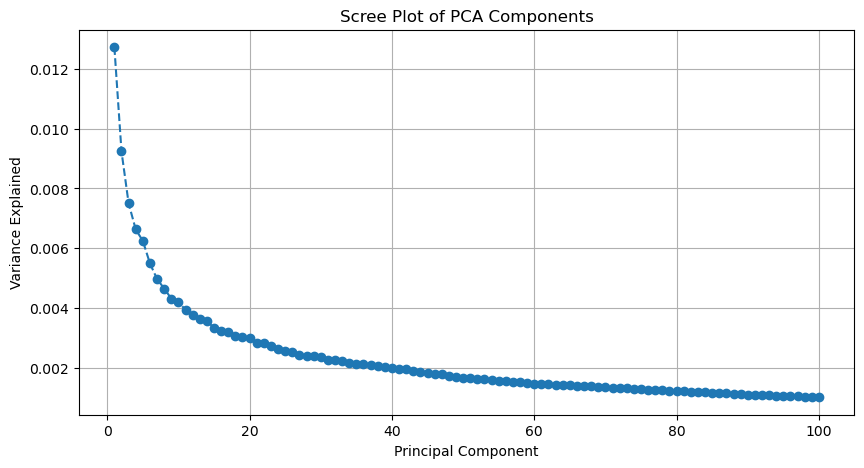

In [46]:
import matplotlib.pyplot as plt
# Plot explained variance ratio
plt.figure(figsize=(10,5))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA Components')
plt.grid()
plt.show()


In [47]:
from sklearn.manifold import TSNE
import seaborn as sns
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

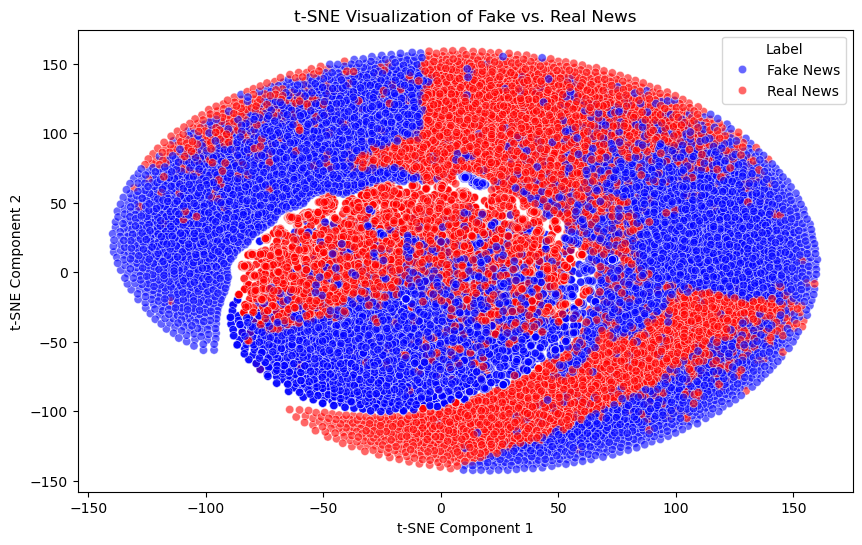

In [48]:
# Create a DataFrame with t-SNE components and labels
tsne_df = pd.DataFrame({
    "Component 1": X_tsne[:, 0], 
    "Component 2": X_tsne[:, 1], 
    "Label": y  # 0 = Real News, 1 = Fake News
})

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Component 1", 
    y="Component 2", 
    hue=tsne_df["Label"].map({0: "Real News", 1: "Fake News"}),  # Correct label mapping
    data=tsne_df, 
    palette=["blue", "red"],  # Adjusted colors (blue for real, red for fake)
    alpha=0.6
)

# Adjust titles and labels
plt.title("t-SNE Visualization of Fake vs. Real News")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Label")  # Legend now correctly displays "Real News" & "Fake News"
plt.show()


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score, precision_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV

# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Define hyperparameter search space
param_dist = {
    "n_estimators": randint(50, 500),  # Number of trees
    "max_depth": randint(3, 12),  # Depth of each tree
    "learning_rate": uniform(0.01, 0.3),  # Learning rate
    "subsample": uniform(0.5, 0.5),  # Fraction of samples used per tree
    "colsample_bytree": uniform(0.5, 0.5),  # Fraction of features per tree
    "gamma": uniform(0, 0.5),  # Min loss reduction for splitting
    "reg_alpha": uniform(0, 1),  # L1 regularization
    "reg_lambda": uniform(0, 1)  # L2 regularization
}


In [52]:
# # Define Randomized Search
# random_search = RandomizedSearchCV(
#     xgb,
#     param_distributions=param_dist,
#     n_iter=20,  # Number of random parameter combinations to test
#     scoring="accuracy",
#     cv=5,  # 5-fold cross-validation
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # Use all available CPUs
# )
# 
# # Fit the search
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# random_search.fit(X_train_pca, y_train)
# 
# # Get the best model from search
# best_xgb = random_search.best_estimator_
# 
# # Display best hyperparameters
# print("\n🔹 Best Hyperparameters from RandomizedSearch:")
# print(random_search.best_params_)


In [53]:
# # Make predictions with the best model
# y_pred = best_xgb.predict(X_test_pca)
# 
# # Evaluate Performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\n📌 XGBoost Model Accuracy: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))
# 
# # Plot Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real News", "Fake News"], yticklabels=["Real News", "Fake News"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Best XGBoost Model")
# plt.show()


In [54]:
# Define custom recall scorer for Fake News (label=1)
recall_scorer = make_scorer(recall_score, greater_is_better=True, pos_label=1)

# Use Stratified K-Fold for balanced validation splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Halving Randomized Search
halving_random_search = HalvingRandomSearchCV(
    xgb,
    param_distributions=param_dist,
    factor=2,  # Halves the candidates in each iteration
    max_resources=X_train_pca.shape[0],  # Use the number of training samples as the resource
    min_resources=50,  # Start with at least 50 samples
    scoring=recall_scorer,  # Optimize for Fake News Recall
    cv=cv,  # Stratified K-Fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPUs
)


# Fit Halving Randomized Search on PCA-transformed data
halving_random_search.fit(X_train_pca, y_train)

# Get the best model from search
best_xgb_pca = halving_random_search.best_estimator_

# Display best hyperparameters
print("\n🔹 Best Hyperparameters from Halving RandomizedSearch (PCA):")
print(halving_random_search.best_params_)


n_iterations: 10
n_required_iterations: 10
n_possible_iterations: 10
min_resources_: 50
max_resources_: 35918
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 718
n_resources: 50
Fitting 5 folds for each of 718 candidates, totalling 3590 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.6872700594236812, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=152, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.7296244459829335; total time=   0.0s
[CV] END colsample_bytree=0.9961057796456088, gamma=0.30874075481385826, learning_rate=0.19349594814648427, max_depth=11, n_estimators=98, reg_alpha=0.5247746602583891, reg_lambda=0.3998609717152555, subsample=0.5233328316068078; total time=   0.0s
[CV] END colsample_bytree=0.9868777594207296, gamma=0.11638567021515211, learning_rate=0.03718193035984624, max_depth=5, n_estimators=413, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   0.0s
[CV] END colsample_bytree=0.6293899908000085, gamma=0.331261142176991, learning_rate=0.10351332282682328, max_depth=8, n_estimators=103, reg_alpha=0.5467102793432796, reg_lambda=0.18485445552552704, subsample=0.9847923138822793; total time=   0.0s
[CV]

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9961057796456088, gamma=0.30874075481385826, learning_rate=0.19349594814648427, max_depth=11, n_estimators=98, reg_alpha=0.5247746602583891, reg_lambda=0.3998609717152555, subsample=0.5233328316068078; total time=   0.0s
[CV] END colsample_bytree=0.9961057796456088, gamma=0.30874075481385826, learning_rate=0.19349594814648427, max_depth=11, n_estimators=98, reg_alpha=0.5247746602583891, reg_lambda=0.3998609717152555, subsample=0.5233328316068078; total time=   0.0s
[CV] END colsample_bytree=0.5488360570031919, gamma=0.34211651325607845, learning_rate=0.1420457481218804, max_depth=9, n_estimators=477, reg_alpha=0.4951769101112702, reg_lambda=0.034388521115218396, subsample=0.954660201039391; total time=   0.0s
[CV] END colsample_bytree=0.8736600550686904, gamma=0.2698460661945399, learning_rate=0.18602534969915446, max_depth=11, n_estimators=301, reg_alpha=0.6070342476866847, reg_lambda=0.27599918202254337, subsample=0.6481367528520412; total time=   0.0s
[CV

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.6872700594236812, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, n_estimators=152, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.7296244459829335; total time=   0.0s
[CV] END colsample_bytree=0.9961057796456088, gamma=0.30874075481385826, learning_rate=0.19349594814648427, max_depth=11, n_estimators=98, reg_alpha=0.5247746602583891, reg_lambda=0.3998609717152555, subsample=0.5233328316068078; total time=   0.0s
[CV] END colsample_bytree=0.8037724259507192, gamma=0.08526206184364576, learning_rate=0.029515477895583855, max_depth=6, n_estimators=138, reg_alpha=0.9656320330745594, reg_lambda=0.8083973481164611, subsample=0.6523068845866853; total time=   0.0s
[CV] END colsample_bytree=0.6293899908000085, gamma=0.331261142176991, learning_rate=0.10351332282682328, max_depth=8, n_estimators=103, reg_alpha=0.5467102793432796, reg_lambda=0.18485445552552704, subsample=0.9847923138822793; total time=   0.0s
[CV

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.6668543055695109, gamma=0.07143340896097039, learning_rate=0.20526654188465587, max_depth=7, n_estimators=307, reg_alpha=0.7219987722668247, reg_lambda=0.9385527090157502, subsample=0.5003893829205072; total time=   0.0s
[CV] END colsample_bytree=0.9868777594207296, gamma=0.11638567021515211, learning_rate=0.03718193035984624, max_depth=5, n_estimators=413, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   0.0s
[CV] END colsample_bytree=0.6293899908000085, gamma=0.331261142176991, learning_rate=0.10351332282682328, max_depth=8, n_estimators=103, reg_alpha=0.5467102793432796, reg_lambda=0.18485445552552704, subsample=0.9847923138822793; total time=   0.0s
[CV] END colsample_bytree=0.8736600550686904, gamma=0.2698460661945399, learning_rate=0.18602534969915446, max_depth=11, n_estimators=301, reg_alpha=0.6070342476866847, reg_lambda=0.27599918202254337, subsample=0.6481367528520412; total time=   0.0s
[CV]

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

----------
iter: 1
n_candidates: 359
n_resources: 100
Fitting 5 folds for each of 359 candidates, totalling 1795 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

----------
iter: 2
n_candidates: 180
n_resources: 200
Fitting 5 folds for each of 180 candidates, totalling 900 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9942104969817405, gamma=0.48863996628322365, learning_rate=0.2481454311724119, max_depth=5, n_estimators=490, reg_alpha=0.5070824240602667, reg_lambda=0.6379018745529615, subsample=0.9925872775453374; total time=   0.0s
[CV] END colsample_bytree=0.9942104969817405, gamma=0.48863996628322365, learning_rate=0.2481454311724119, max_depth=5, n_estimators=490, reg_alpha=0.5070824240602667, reg_lambda=0.6379018745529615, subsample=0.9925872775453374; total time=   0.0s
[CV] END colsample_bytree=0.9942104969817405, gamma=0.48863996628322365, learning_rate=0.2481454311724119, max_depth=5, n_estimators=490, reg_alpha=0.5070824240602667, reg_lambda=0.6379018745529615, subsample=0.9925872775453374; total time=   0.0s
[CV] END colsample_bytree=0.8840027176566048, gamma=0.21718074907060886, learning_rate=0.14393257653896463, max_depth=4, n_estimators=365, reg_alpha=0.6653652084189043, reg_lambda=0.5007109258366713, subsample=0.82243061140749; total time=   0.0s
[CV] END 

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9029894504337919, gamma=0.29600842139453143, learning_rate=0.05977030731123587, max_depth=9, n_estimators=329, reg_alpha=0.36275360039915205, reg_lambda=0.5466963282963399, subsample=0.9199101761017442; total time=   0.0s
[CV] END colsample_bytree=0.9029894504337919, gamma=0.29600842139453143, learning_rate=0.05977030731123587, max_depth=9, n_estimators=329, reg_alpha=0.36275360039915205, reg_lambda=0.5466963282963399, subsample=0.9199101761017442; total time=   0.0s
[CV] END colsample_bytree=0.9029894504337919, gamma=0.29600842139453143, learning_rate=0.05977030731123587, max_depth=9, n_estimators=329, reg_alpha=0.36275360039915205, reg_lambda=0.5466963282963399, subsample=0.9199101761017442; total time=   0.0s
[CV] END colsample_bytree=0.9029894504337919, gamma=0.29600842139453143, learning_rate=0.05977030731123587, max_depth=9, n_estimators=329, reg_alpha=0.36275360039915205, reg_lambda=0.5466963282963399, subsample=0.9199101761017442; total time=   0.0s


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.5200694295426833, gamma=0.44495668818143125, learning_rate=0.307588824171593, max_depth=3, n_estimators=96, reg_alpha=0.21031855628579366, reg_lambda=0.7653633638580407, subsample=0.6265131704601266; total time=   0.0s
[CV] END colsample_bytree=0.5200694295426833, gamma=0.44495668818143125, learning_rate=0.307588824171593, max_depth=3, n_estimators=96, reg_alpha=0.21031855628579366, reg_lambda=0.7653633638580407, subsample=0.6265131704601266; total time=   0.0s
[CV] END colsample_bytree=0.5000153594226913, gamma=0.3560685229403025, learning_rate=0.11697885279586168, max_depth=5, n_estimators=159, reg_alpha=0.01289746978952544, reg_lambda=0.5402994067614997, subsample=0.9255753677129909; total time=   0.0s
[CV] END colsample_bytree=0.5000153594226913, gamma=0.3560685229403025, learning_rate=0.11697885279586168, max_depth=5, n_estimators=159, reg_alpha=0.01289746978952544, reg_lambda=0.5402994067614997, subsample=0.9255753677129909; total time=   0.0s
[CV] END

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.7113280168944791, gamma=0.49781891679740414, learning_rate=0.013148092341983332, max_depth=3, n_estimators=278, reg_alpha=0.7859252762089134, reg_lambda=0.617931559846298, subsample=0.670923642749046; total time=   0.0s
[CV] END colsample_bytree=0.7113280168944791, gamma=0.49781891679740414, learning_rate=0.013148092341983332, max_depth=3, n_estimators=278, reg_alpha=0.7859252762089134, reg_lambda=0.617931559846298, subsample=0.670923642749046; total time=   0.0s
[CV] END colsample_bytree=0.7113280168944791, gamma=0.49781891679740414, learning_rate=0.013148092341983332, max_depth=3, n_estimators=278, reg_alpha=0.7859252762089134, reg_lambda=0.617931559846298, subsample=0.670923642749046; total time=   0.0s
[CV] END colsample_bytree=0.7113280168944791, gamma=0.49781891679740414, learning_rate=0.013148092341983332, max_depth=3, n_estimators=278, reg_alpha=0.7859252762089134, reg_lambda=0.617931559846298, subsample=0.670923642749046; total time=   0.0s
[CV] END

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.6925513014115148, gamma=0.4274028893996307, learning_rate=0.2957245917989931, max_depth=5, n_estimators=441, reg_alpha=0.27061999469359665, reg_lambda=0.19416286904608226, subsample=0.7372174468103675; total time=   0.0s
[CV] END colsample_bytree=0.6925513014115148, gamma=0.4274028893996307, learning_rate=0.2957245917989931, max_depth=5, n_estimators=441, reg_alpha=0.27061999469359665, reg_lambda=0.19416286904608226, subsample=0.7372174468103675; total time=   0.0s
[CV] END colsample_bytree=0.6925513014115148, gamma=0.4274028893996307, learning_rate=0.2957245917989931, max_depth=5, n_estimators=441, reg_alpha=0.27061999469359665, reg_lambda=0.19416286904608226, subsample=0.7372174468103675; total time=   0.0s
[CV] END colsample_bytree=0.6696203305869182, gamma=0.031215663638890168, learning_rate=0.1558520962314649, max_depth=10, n_estimators=228, reg_alpha=0.248539820927426, reg_lambda=0.3169426217672814, subsample=0.904413161745842; total time=   0.0s
[CV] 

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.7915651095497918, gamma=0.3651108588786246, learning_rate=0.1194467410623396, max_depth=9, n_estimators=366, reg_alpha=0.9965656562889824, reg_lambda=0.7004317991565039, subsample=0.8852236105369948; total time=   0.0s
[CV] END colsample_bytree=0.7915651095497918, gamma=0.3651108588786246, learning_rate=0.1194467410623396, max_depth=9, n_estimators=366, reg_alpha=0.9965656562889824, reg_lambda=0.7004317991565039, subsample=0.8852236105369948; total time=   0.0s
[CV] END colsample_bytree=0.7915651095497918, gamma=0.3651108588786246, learning_rate=0.1194467410623396, max_depth=9, n_estimators=366, reg_alpha=0.9965656562889824, reg_lambda=0.7004317991565039, subsample=0.8852236105369948; total time=   0.0s
[CV] END colsample_bytree=0.6686514182337432, gamma=0.4707884263669669, learning_rate=0.1689141898325103, max_depth=7, n_estimators=137, reg_alpha=0.9241077159112795, reg_lambda=0.9751799759755083, subsample=0.9166021782983371; total time=   0.0s
[CV] END col

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.8361949063993522, gamma=0.08493629720223816, learning_rate=0.02662476653267333, max_depth=10, n_estimators=204, reg_alpha=0.7659715748551791, reg_lambda=0.41367867898526034, subsample=0.8264864609539697; total time=   0.0s
[CV] END colsample_bytree=0.8361949063993522, gamma=0.08493629720223816, learning_rate=0.02662476653267333, max_depth=10, n_estimators=204, reg_alpha=0.7659715748551791, reg_lambda=0.41367867898526034, subsample=0.8264864609539697; total time=   0.0s
[CV] END colsample_bytree=0.7898095486140684, gamma=0.011109241012790205, learning_rate=0.306561996113712, max_depth=5, n_estimators=459, reg_alpha=0.5993597250421656, reg_lambda=0.7286562842366027, subsample=0.6576818716330588; total time=   0.0s
[CV] END colsample_bytree=0.7898095486140684, gamma=0.011109241012790205, learning_rate=0.306561996113712, max_depth=5, n_estimators=459, reg_alpha=0.5993597250421656, reg_lambda=0.7286562842366027, subsample=0.6576818716330588; total time=   0.0s
[C

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9162085917051264, gamma=0.4877365141570109, learning_rate=0.15224928888159592, max_depth=9, n_estimators=316, reg_alpha=0.6377741418455916, reg_lambda=0.8200675020556494, subsample=0.5207894799232968; total time=   0.0s
[CV] END colsample_bytree=0.7490649717740212, gamma=0.34465520605134514, learning_rate=0.08569357812090611, max_depth=8, n_estimators=418, reg_alpha=0.6136379029893838, reg_lambda=0.8979352934437369, subsample=0.9049622101514496; total time=   0.0s
[CV] END colsample_bytree=0.7490649717740212, gamma=0.34465520605134514, learning_rate=0.08569357812090611, max_depth=8, n_estimators=418, reg_alpha=0.6136379029893838, reg_lambda=0.8979352934437369, subsample=0.9049622101514496; total time=   0.0s
[CV] END colsample_bytree=0.7490649717740212, gamma=0.34465520605134514, learning_rate=0.08569357812090611, max_depth=8, n_estimators=418, reg_alpha=0.6136379029893838, reg_lambda=0.8979352934437369, subsample=0.9049622101514496; total time=   0.0s
[CV] 

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

----------
iter: 3
n_candidates: 90
n_resources: 400
Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.5345767838592506, gamma=0.4137493708178367, learning_rate=0.08636216287649834, max_depth=9, n_estimators=99, reg_alpha=0.04331527325431195, reg_lambda=0.6993394662526431, subsample=0.6652805011531454; total time=   0.0s
[CV] END colsample_bytree=0.5345767838592506, gamma=0.4137493708178367, learning_rate=0.08636216287649834, max_depth=9, n_estimators=99, reg_alpha=0.04331527325431195, reg_lambda=0.6993394662526431, subsample=0.6652805011531454; total time=   0.0s
[CV] END colsample_bytree=0.5345767838592506, gamma=0.4137493708178367, learning_rate=0.08636216287649834, max_depth=9, n_estimators=99, reg_alpha=0.04331527325431195, reg_lambda=0.6993394662526431, subsample=0.6652805011531454; total time=   0.0s
[CV] END colsample_bytree=0.8723683639146049, gamma=0.20620153023393306, learning_rate=0.06872668192168738, max_depth=10, n_estimators=161, reg_alpha=0.1305045596374398, reg_lambda=0.44053915987299475, subsample=0.6586527387102432; total time=   0.0s
[CV] 

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.737544936433384, gamma=0.4612171418280622, learning_rate=0.03182048433360052, max_depth=4, n_estimators=160, reg_alpha=0.34993785357071405, reg_lambda=0.7824258122127878, subsample=0.9962573100809857; total time=   0.0s
[CV] END colsample_bytree=0.8412702393835785, gamma=0.16580842455391698, learning_rate=0.16017379522924938, max_depth=10, n_estimators=380, reg_alpha=0.5105704087285036, reg_lambda=0.11995294173096982, subsample=0.6560320223260103; total time=   0.0s
[CV] END colsample_bytree=0.8412702393835785, gamma=0.16580842455391698, learning_rate=0.16017379522924938, max_depth=10, n_estimators=380, reg_alpha=0.5105704087285036, reg_lambda=0.11995294173096982, subsample=0.6560320223260103; total time=   0.0s
[CV] END colsample_bytree=0.8412702393835785, gamma=0.16580842455391698, learning_rate=0.16017379522924938, max_depth=10, n_estimators=380, reg_alpha=0.5105704087285036, reg_lambda=0.11995294173096982, subsample=0.6560320223260103; total time=   0.0s

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:50:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

----------
iter: 4
n_candidates: 45
n_resources: 800
Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.7067082246476307, gamma=0.3790925055382687, learning_rate=0.2330271358229828, max_depth=5, n_estimators=240, reg_alpha=0.10593071255849296, reg_lambda=0.15156937158767358, subsample=0.5468784603227783; total time=   0.0s
[CV] END colsample_bytree=0.5181438113067511, gamma=0.13785992654777612, learning_rate=0.09268370160368361, max_depth=10, n_estimators=443, reg_alpha=0.271949726128631, reg_lambda=0.7593982624179637, subsample=0.72486992122527; total time=   0.1s
[CV] END colsample_bytree=0.5181438113067511, gamma=0.13785992654777612, learning_rate=0.09268370160368361, max_depth=10, n_estimators=443, reg_alpha=0.271949726128631, reg_lambda=0.7593982624179637, subsample=0.72486992122527; total time=   0.0s
[CV] END colsample_bytree=0.5181438113067511, gamma=0.13785992654777612, learning_rate=0.09268370160368361, max_depth=10, n_estimators=443, reg_alpha=0.271949726128631, reg_lambda=0.7593982624179637, subsample=0.72486992122527; total time=   0.0s
[CV] END c

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


----------
iter: 5
n_candidates: 23
n_resources: 1600
Fitting 5 folds for each of 23 candidates, totalling 115 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9926836561208674, gamma=0.2355327263469072, learning_rate=0.06463214164647497, max_depth=4, n_estimators=164, reg_alpha=0.5124576558819216, reg_lambda=0.7416869442286655, subsample=0.8494229265804523; total time=   0.1s
[CV] END colsample_bytree=0.9926836561208674, gamma=0.2355327263469072, learning_rate=0.06463214164647497, max_depth=4, n_estimators=164, reg_alpha=0.5124576558819216, reg_lambda=0.7416869442286655, subsample=0.8494229265804523; total time=   0.1s
[CV] END colsample_bytree=0.9926836561208674, gamma=0.2355327263469072, learning_rate=0.06463214164647497, max_depth=4, n_estimators=164, reg_alpha=0.5124576558819216, reg_lambda=0.7416869442286655, subsample=0.8494229265804523; total time=   0.1s
[CV] END colsample_bytree=0.9565207334449279, gamma=0.28606148186110314, learning_rate=0.06423554516871385, max_depth=4, n_estimators=385, reg_alpha=0.19864457689740578, reg_lambda=0.24685702759573291, subsample=0.6532077246755181; total time=   0.1s
[CV] 

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or

[CV] END colsample_bytree=0.7969012404048077, gamma=0.01640481206430422, learning_rate=0.2008127406339905, max_depth=6, n_estimators=427, reg_alpha=0.9407845205031079, reg_lambda=0.5069204379618346, subsample=0.7047060359085091; total time=   0.1s
[CV] END colsample_bytree=0.7969012404048077, gamma=0.01640481206430422, learning_rate=0.2008127406339905, max_depth=6, n_estimators=427, reg_alpha=0.9407845205031079, reg_lambda=0.5069204379618346, subsample=0.7047060359085091; total time=   0.1s
[CV] END colsample_bytree=0.7969012404048077, gamma=0.01640481206430422, learning_rate=0.2008127406339905, max_depth=6, n_estimators=427, reg_alpha=0.9407845205031079, reg_lambda=0.5069204379618346, subsample=0.7047060359085091; total time=   0.1s
[CV] END colsample_bytree=0.5215799559752881, gamma=0.44557155684903554, learning_rate=0.16831033272588997, max_depth=7, n_estimators=213, reg_alpha=0.5538542844013208, reg_lambda=0.969302535619099, subsample=0.7615489220850744; total time=   0.1s
[CV] END

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9808328679774065, gamma=0.31748002279551657, learning_rate=0.2364513459822543, max_depth=9, n_estimators=257, reg_alpha=0.4094778530052039, reg_lambda=0.42268911339618953, subsample=0.9109032219505434; total time=   0.1s
[CV] END colsample_bytree=0.9536900823564235, gamma=0.11942833020096383, learning_rate=0.15089253240421271, max_depth=11, n_estimators=142, reg_alpha=0.47297134609551017, reg_lambda=0.6225196957297452, subsample=0.7348718814953419; total time=   0.1s
[CV] END colsample_bytree=0.8744131684816532, gamma=0.32557379244083706, learning_rate=0.19627857024352935, max_depth=8, n_estimators=322, reg_alpha=0.8414475530847599, reg_lambda=0.47128716739816456, subsample=0.9895524690075772; total time=   0.1s
[CV] END colsample_bytree=0.887955766403653, gamma=0.06396846225589159, learning_rate=0.1142521247275543, max_depth=7, n_estimators=168, reg_alpha=0.3959615887476049, reg_lambda=0.6693086091618792, subsample=0.9459465516282812; total time=   0.1s
[CV

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.7490649717740212, gamma=0.34465520605134514, learning_rate=0.08569357812090611, max_depth=8, n_estimators=418, reg_alpha=0.6136379029893838, reg_lambda=0.8979352934437369, subsample=0.9049622101514496; total time=   0.2s
[CV] END colsample_bytree=0.7490649717740212, gamma=0.34465520605134514, learning_rate=0.08569357812090611, max_depth=8, n_estimators=418, reg_alpha=0.6136379029893838, reg_lambda=0.8979352934437369, subsample=0.9049622101514496; total time=   0.2s
[CV] END colsample_bytree=0.7237759275530309, gamma=0.36500086054043074, learning_rate=0.11732642898811427, max_depth=9, n_estimators=485, reg_alpha=0.11536280130570387, reg_lambda=0.8696813233436628, subsample=0.7361132128781022; total time=   0.1s
[CV] END colsample_bytree=0.7237759275530309, gamma=0.36500086054043074, learning_rate=0.11732642898811427, max_depth=9, n_estimators=485, reg_alpha=0.11536280130570387, reg_lambda=0.8696813233436628, subsample=0.7361132128781022; total time=   0.1s
[C

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


[CV] END colsample_bytree=0.624834004429593, gamma=0.24471248182157024, learning_rate=0.07636283254588067, max_depth=11, n_estimators=414, reg_alpha=0.6699174645500392, reg_lambda=0.044165437710100175, subsample=0.7941318784849656; total time=   0.1s
[CV] END colsample_bytree=0.624834004429593, gamma=0.24471248182157024, learning_rate=0.07636283254588067, max_depth=11, n_estimators=414, reg_alpha=0.6699174645500392, reg_lambda=0.044165437710100175, subsample=0.7941318784849656; total time=   0.1s
[CV] END colsample_bytree=0.6212721382914854, gamma=0.14584672536079302, learning_rate=0.2872928701157674, max_depth=6, n_estimators=118, reg_alpha=0.28924390281966816, reg_lambda=0.3693541300894323, subsample=0.8318713693126936; total time=   0.0s
[CV] END colsample_bytree=0.6212721382914854, gamma=0.14584672536079302, learning_rate=0.2872928701157674, max_depth=6, n_estimators=118, reg_alpha=0.28924390281966816, reg_lambda=0.3693541300894323, subsample=0.8318713693126936; total time=   0.1s


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.5258929443664084, gamma=0.27865528765715425, learning_rate=0.056810743401993075, max_depth=8, n_estimators=386, reg_alpha=0.35833465667167375, reg_lambda=0.9128924447365754, subsample=0.7828440860705028; total time=   0.1s
[CV] END colsample_bytree=0.5258929443664084, gamma=0.27865528765715425, learning_rate=0.056810743401993075, max_depth=8, n_estimators=386, reg_alpha=0.35833465667167375, reg_lambda=0.9128924447365754, subsample=0.7828440860705028; total time=   0.2s
[CV] END colsample_bytree=0.5258929443664084, gamma=0.27865528765715425, learning_rate=0.056810743401993075, max_depth=8, n_estimators=386, reg_alpha=0.35833465667167375, reg_lambda=0.9128924447365754, subsample=0.7828440860705028; total time=   0.1s
[CV] END colsample_bytree=0.5258929443664084, gamma=0.27865528765715425, learning_rate=0.056810743401993075, max_depth=8, n_estimators=386, reg_alpha=0.35833465667167375, reg_lambda=0.9128924447365754, subsample=0.7828440860705028; total time=   0

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8532378632434505, gamma=0.01579307241282102, learning_rate=0.29086367387310696, max_depth=9, n_estimators=272, reg_alpha=0.5412963353010705, reg_lambda=0.7090605194509164, subsample=0.9354845618730427; total time=   0.1s
[CV] END colsample_bytree=0.8532378632434505, gamma=0.01579307241282102, learning_rate=0.29086367387310696, max_depth=9, n_estimators=272, reg_alpha=0.5412963353010705, reg_lambda=0.7090605194509164, subsample=0.9354845618730427; total time=   0.1s
[CV] END colsample_bytree=0.8532378632434505, gamma=0.01579307241282102, learning_rate=0.29086367387310696, max_depth=9, n_estimators=272, reg_alpha=0.5412963353010705, reg_lambda=0.7090605194509164, subsample=0.9354845618730427; total time=   0.1s
[CV] END colsample_bytree=0.8532378632434505, gamma=0.01579307241282102, learning_rate=0.29086367387310696, max_depth=9, n_estimators=272, reg_alpha=0.5412963353010705, reg_lambda=0.7090605194509164, subsample=0.9354845618730427; total time=   0.1s
[CV]

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

----------
iter: 7
n_candidates: 6
n_resources: 6400
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.8854921462660678, gamma=0.3542860023013147, learning_rate=0.15207216653052655, max_depth=8, n_estimators=169, reg_alpha=0.04574203381251285, reg_lambda=0.8715368061523763, subsample=0.9867444845886985; total time=   0.1s
[CV] END colsample_bytree=0.7237759275530309, gamma=0.36500086054043074, learning_rate=0.11732642898811427, max_depth=9, n_estimators=485, reg_alpha=0.11536280130570387, reg_lambda=0.8696813233436628, subsample=0.7361132128781022; total time=   0.1s
[CV] END colsample_bytree=0.7237759275530309, gamma=0.36500086054043074, learning_rate=0.11732642898811427, max_depth=9, n_estimators=485, reg_alpha=0.11536280130570387, reg_lambda=0.8696813233436628, subsample=0.7361132128781022; total time=   0.1s
[CV] END colsample_bytree=0.7237759275530309, gamma=0.36500086054043074, learning_rate=0.11732642898811427, max_depth=9, n_estimators=485, reg_alpha=0.11536280130570387, reg_lambda=0.8696813233436628, subsample=0.7361132128781022; total time=   0.1s
[

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.6869040544335012, gamma=0.3126649798521165, learning_rate=0.013702313818112202, max_depth=5, n_estimators=388, reg_alpha=0.7422935381702628, reg_lambda=0.244161608716153, subsample=0.7990045586643748; total time=   0.4s
[CV] END colsample_bytree=0.9225604257480173, gamma=0.3979631935717512, learning_rate=0.06253694203910597, max_depth=11, n_estimators=176, reg_alpha=0.2205042634356471, reg_lambda=0.21820753455217223, subsample=0.9370358866525925; total time=   0.1s
[CV] END colsample_bytree=0.5675006387106034, gamma=0.24187747096620638, learning_rate=0.09097336671765846, max_depth=6, n_estimators=276, reg_alpha=0.8415296603100434, reg_lambda=0.8464078493145573, subsample=0.9776181563617394; total time=   0.1s
[CV] END colsample_bytree=0.5675006387106034, gamma=0.24187747096620638, learning_rate=0.09097336671765846, max_depth=6, n_estimators=276, reg_alpha=0.8415296603100434, reg_lambda=0.8464078493145573, subsample=0.9776181563617394; total time=   0.1s
[CV]

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9377443251979483, gamma=0.15123315873073484, learning_rate=0.26760943637337214, max_depth=4, n_estimators=85, reg_alpha=0.14669511401518154, reg_lambda=0.690322846900729, subsample=0.9725120322902844; total time=   0.0s
[CV] END colsample_bytree=0.8564411846723683, gamma=0.19645466780244664, learning_rate=0.08761328422469034, max_depth=3, n_estimators=136, reg_alpha=0.7941823453171836, reg_lambda=0.6252161250314382, subsample=0.9688198899789511; total time=   0.1s
[CV] END colsample_bytree=0.8564411846723683, gamma=0.19645466780244664, learning_rate=0.08761328422469034, max_depth=3, n_estimators=136, reg_alpha=0.7941823453171836, reg_lambda=0.6252161250314382, subsample=0.9688198899789511; total time=   0.1s
[CV] END colsample_bytree=0.8564411846723683, gamma=0.19645466780244664, learning_rate=0.08761328422469034, max_depth=3, n_estimators=136, reg_alpha=0.7941823453171836, reg_lambda=0.6252161250314382, subsample=0.9688198899789511; total time=   0.1s
[CV] 

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

----------
iter: 8
n_candidates: 3
n_resources: 12800
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END colsample_bytree=0.9814634376187898, gamma=0.24177282335996236, learning_rate=0.2517977649325474, max_depth=3, n_estimators=221, reg_alpha=0.043412532854819164, reg_lambda=0.6331513755940223, subsample=0.9757016711033285; total time=   0.3s
[CV] END colsample_bytree=0.9190760917759622, gamma=0.14264516917865822, learning_rate=0.13875477801890707, max_depth=4, n_estimators=304, reg_alpha=0.6588250701400705, reg_lambda=0.25230724983940656, subsample=0.6101126506886576; total time=   0.5s
[CV] END colsample_bytree=0.8959678114818821, gamma=0.20115352069118597, learning_rate=0.13748605571872913, max_depth=9, n_estimators=336, reg_alpha=0.04515136441229195, reg_lambda=0.4378998871429123, subsample=0.9219967359710124; total time=   0.7s
[CV] END colsample_bytree=0.959198771040779, gamma=0.3248940233821498, learning_rate=0.041030234458145014, max_depth=6, n_estimators=392, reg_alpha=0.7289392001051572, reg_lambda=0.7798208840100681, subsample=0.5591093111455443; total time=   1.6s
[C

/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:51:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.


🔹 Best Hyperparameters from Halving RandomizedSearch (PCA):
{'colsample_bytree': 0.5974875999501446, 'gamma': 0.44520475860966424, 'learning_rate': 0.23499333953562124, 'max_depth': 3, 'n_estimators': 449, 'reg_alpha': 0.7587153211639207, 'reg_lambda': 0.5971553059903019, 'subsample': 0.8270663685139368}



📌 XGBoost Model Accuracy (PCA): 0.9776
📌 Fake News Recall: 0.9775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4270
           1       0.98      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



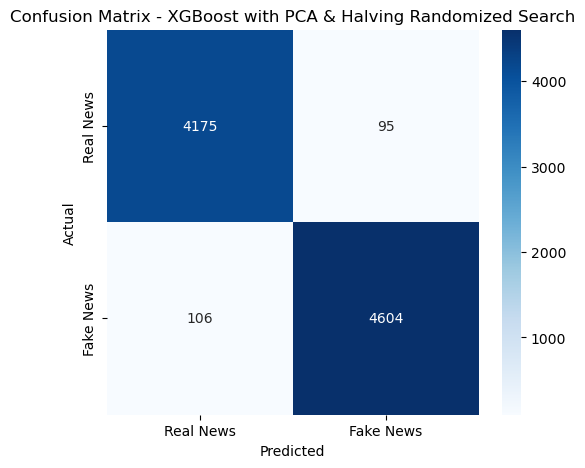

In [55]:
# Make predictions with the best PCA-based XGBoost model
y_pred_pca = best_xgb_pca.predict(X_test_pca)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred_pca)
recall = recall_score(y_test, y_pred_pca, pos_label=1)
print(f"\n📌 XGBoost Model Accuracy (PCA): {accuracy:.4f}")
print(f"📌 Fake News Recall: {recall:.4f}")  # Prioritized metric
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real News", "Fake News"], yticklabels=["Real News", "Fake News"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost with PCA & Halving Randomized Search")
plt.show()
